In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')


In [2]:
def fasta_parse(fasta_file: str, comment='#'):
    """
    Parses a FASTA file and extracts sequence names and their corresponding sequences.

    The function reads a given FASTA file, where each sequence is identified by a line starting with 
    the '>' symbol, followed by the sequence name. The subsequent lines contain the sequence data, 
    which is concatenated into a single string for each sequence. The function also ignores any comment 
    lines that start with the specified comment character.

    Parameters:

    fasta_file : str
        The path to the FASTA file to be parsed.
    comment : str, optional
        A character indicating comment lines that should be ignored. Default is '#'.
    
    Returns:
    -------
    tuple:
        A tuple containing two lists:
        - names : List[str]
            A list of sequence names extracted from lines starting with '>'.
        - sequences : List[str]
            A list of corresponding sequences, with each sequence represented as a string.
    
    Example:
    --------
    >>> names, sequences = fasta_parse("example.fasta")
    >>> print(names)
    ['sequence1', 'sequence2']
    >>> print(sequences)
    ['ATCGATCG', 'GGCTAAGT']

    Notes:
    ------
    - Sequence names are taken from lines starting with '>', with the '>' character removed.
    - Sequences are converted to uppercase.
    - The function assumes that the sequences are stored in a standard FASTA format.

    """
    names = []
    sequences = []
    name = None
    sequence = []
    with open(fasta_file, 'r') as f:
        for line in f:
            if line.startswith(comment):
                continue
            line = line.strip()
            if line.startswith('>'):
                if name is not None:
                    names.append(name)
                    sequences.append(''.join(sequence))
                name = line[1:]
                sequence = []
            else:
                sequence.append(line.upper())
        if name is not None:
            names.append(name)
            sequences.append(''.join(sequence))

    return names, sequences

def dedup_sequences(data_tuple):
    """
    Removes duplicate sequences from a tuple containing sequence names and sequences.

    This function takes a tuple consisting of two lists: one for sequence names and 
    one for the corresponding sequences. It removes duplicate sequences and returns 
    a new tuple containing only the unique sequences and their corresponding names.

    Parameters:
    ----------
    data_tuple : tuple
        A tuple containing two lists:
        - names (list of str): A list of sequence names.
        - sequences (list of str): A list of nucleotide or protein sequences.

    Returns:
    -------
    tuple
        A tuple containing two lists:
        - result_names (list of str): A list of names corresponding to the unique sequences.
        - result_sequences (list of str): A list of unique sequences.

    Example:
    --------
    >>> names = ["seq1", "seq2", "seq3"]
    >>> sequences = ["AGCT", "CGTA", "AGCT"]
    >>> data_tuple = (names, sequences)
    >>> dedup_sequences(data_tuple)
    (["seq1", "seq2"], ["AGCT", "CGTA"])

    This function can also be modified to produce a tuple of duplicate values.
    """
    names, sequences = data_tuple
    unique_sequences = {}
    result_names = []
    result_sequences = []
    duplicate_names = []
    duplicate_sequences = []
    
    for name, seq in zip(names, sequences):
        if seq not in unique_sequences:
            unique_sequences[seq] = name
            result_names.append(name)
            result_sequences.append(seq)
        else:
            # these values are actually not used and return at this stage
            duplicate_names.append(name)
            duplicate_sequences.append(seq)

    print(f"{len(duplicate_sequences)} duplicate sequences removed.")
    return (result_names, result_sequences)

def write_fasta(data_tuple, output_fasta):
    """
    Writes a tuple of names and sequences to a FASTA file.
    
    Parameters:
    ----------
    data_tuple : tuple
        A tuple where the first element is a list of names and the second element is a list of sequences.
    output_fasta : str
        The name of the output FASTA file.
    """
    names, sequences = data_tuple
    with open(output_fasta, 'w') as fasta_file:
        for name, sequence in zip(names, sequences):
            fasta_file.write(f">{name}\n")
            fasta_file.write(f"{sequence}\n")

names, sequences = fasta_parse("data.fasta")
data_tuple = dedup_sequences((names, sequences))

# for archival, hopefully we don't have to read from here again
write_fasta(data_tuple, "dedup_data.fasta")

515 duplicate sequences removed.


what do the different coverage modes mean?
secondary structure while transcription varies
cluster without dedup?
what secondary structure to keep?

model can learn that duplicates exist with different

clustering isn't perfect it's better to remove – same sequence

different structure in test/train

we don't know if it's the right one to keep. - need to make a call? ligands or protein,,, usually a ground state

RNA is sometimes complexed to another molecule

In [3]:
!mmseqs easy-cluster --min-seq-id 0.9 -c 0.8 --threads 8 dedup_data.fasta data clustering_tmp

Create directory clustering_tmp
easy-cluster --min-seq-id 0.9 -c 0.8 --threads 8 dedup_data.fasta data clustering_tmp 

MMseqs Version:                     	15-6f452
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.8
Coverage mode                       	0
Compositional bias                  	1
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residues   

In [4]:
!mmseqs easy-cluster --min-seq-id 0.85 -c 0.7 --threads 8 dedup_data.fasta data_less_strict clustering_tmp

easy-cluster --min-seq-id 0.85 -c 0.7 --threads 8 dedup_data.fasta data_less_strict clustering_tmp 

MMseqs Version:                     	15-6f452
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.7
Coverage mode                       	0
Compositional bias                  	1
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residues                      

In [5]:
!mmseqs easy-cluster --min-seq-id 0.95 -c 0.9 --threads 8 dedup_data.fasta data_more_strict clustering_tmp

easy-cluster --min-seq-id 0.95 -c 0.9 --threads 8 dedup_data.fasta data_more_strict clustering_tmp 

MMseqs Version:                     	15-6f452
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.9
Coverage mode                       	0
Compositional bias                  	1
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residues                      

In [2]:
import pandas as pd

# Load the TSV file into a DataFrame
file_path = 'data_cluster.tsv'
cluster_df = pd.read_csv(file_path, sep='\t', header=None, names=['Cluster_Rep', 'Cluster_Member'])

# Display the first few rows
cluster_df.head()

,Cluster_Rep,Cluster_Member
0,tmRNA_Dich.nodo._TRW-35819_1-352,tmRNA_Dich.nodo._TRW-35819_1-352
1,srp_Myco.hyop._AE017332,srp_Myco.hyop._AE017332
2,5s_Fusarium-cerealis-7,5s_Fusarium-cerealis-7
3,5s_Fusarium-cerealis-7,5s_Fusarium-asiaticum-6
4,5s_Fusarium-cerealis-7,5s_Fusarium-lunulosporum-4


In [6]:
# Group by the cluster representative and count the number of members in each cluster
cluster_size = cluster_df.groupby('Cluster_Rep').size().reset_index(name='Cluster_Size')

# Sort by cluster size to identify the largest clusters
cluster_size_sorted = cluster_size.sort_values(by='Cluster_Size', ascending=False)

# Display the largest clusters
cluster_size_sorted

,Cluster_Rep,Cluster_Size
501,5s_Vibrio-vulnificus-1,41
273,5s_Escherichia-coli-11,35
388,5s_Nocardia-farcinica-1,33
460,5s_Streptomyces-coelicolor-4,29
509,5s_Xenopus-laevis-8,28
...,...,...
758,RNaseP_SM-A3153,1
757,RNaseP_SM-A3048,1
756,RNaseP_SM-A2946,1
755,RNaseP_SM-A2642,1


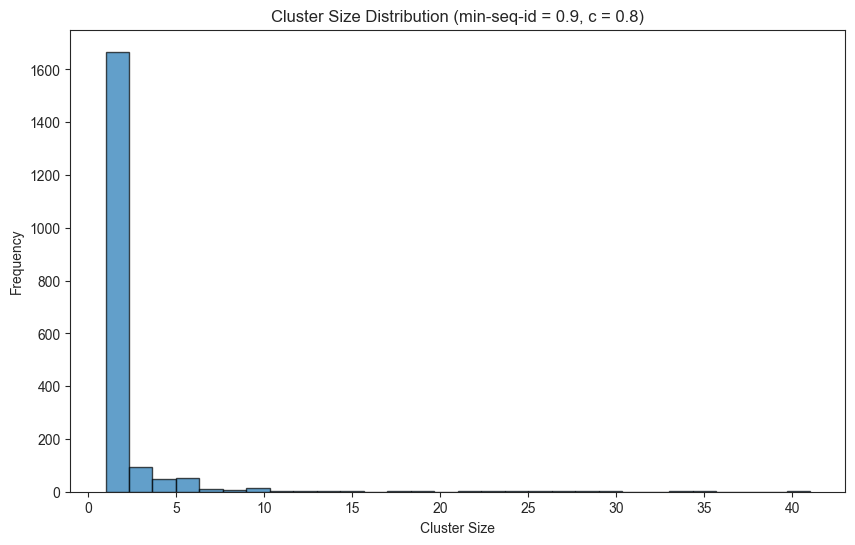

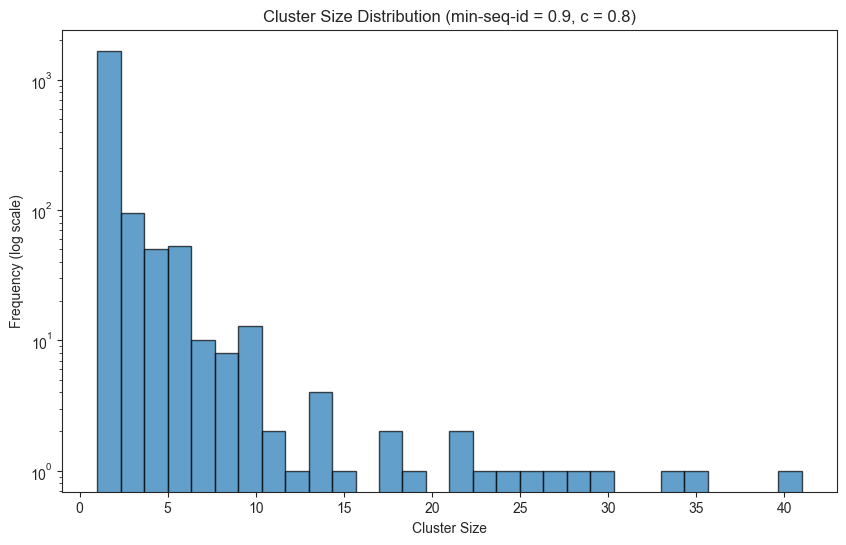

Top 10 Largest Clusters:
                              Cluster_Rep  Cluster_Size  Rep_Length
501                5s_Vibrio-vulnificus-1            41          22
273                5s_Escherichia-coli-11            35          22
388               5s_Nocardia-farcinica-1            33          23
460          5s_Streptomyces-coelicolor-4            29          28
509                   5s_Xenopus-laevis-8            28          19
1087               srp_Mus.musc._AC157822            27          22
176            5s_Bacillus-methanolicus-7            26          26
441                   5s_Secale-cereale-2            24          19
771                            RNaseP_SM2            23          10
490   5s_Trichosporonoides-oedocephalis-1            22          35
Cluster Size Statistics:
count    1918.000000
mean        1.803962
std         2.610549
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        41.000000
Name: Cluster_Size, dtype: float64

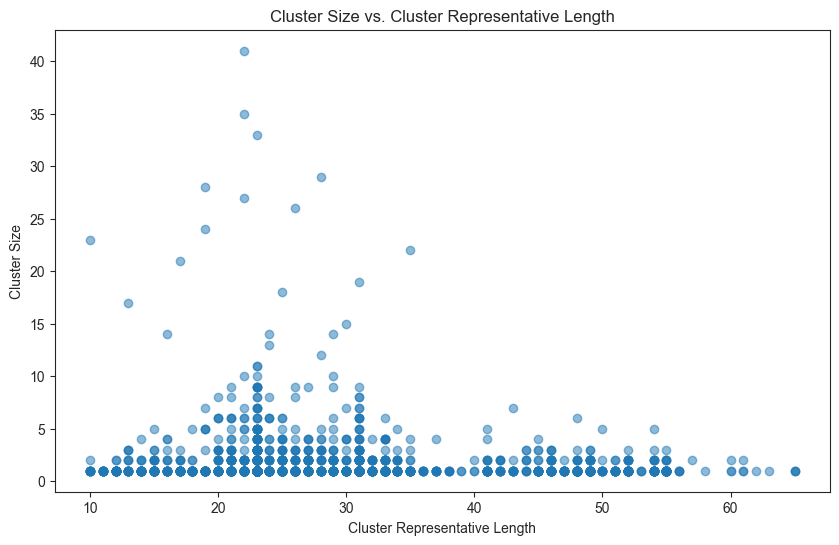

In [27]:
import matplotlib.pyplot as plt

# 1. Distribution of Cluster Sizes (Histogram)
plt.figure(figsize=(10, 6))
plt.hist(cluster_size_sorted['Cluster_Size'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Cluster Size Distribution (min-seq-id = 0.9, c = 0.8)')
plt.xlabel('Cluster Size')
plt.ylabel('Frequency')
plt.show()

# 1b. Distribution of Cluster Sizes (Log Scale)
plt.figure(figsize=(10, 6))
plt.hist(cluster_size_sorted['Cluster_Size'], bins=30, edgecolor='k', alpha=0.7, log=True)
plt.title('Cluster Size Distribution (min-seq-id = 0.9, c = 0.8)')
plt.xlabel('Cluster Size')
plt.ylabel('Frequency (log scale)')
plt.show()

# 2. Top N Largest Clusters
top_n = 10
top_clusters = cluster_size_sorted.head(top_n)
print(f"Top {top_n} Largest Clusters:")
print(top_clusters)

# 3. Cluster Size Statistics
cluster_size_stats = cluster_size_sorted['Cluster_Size'].describe()
print("Cluster Size Statistics:")
print(cluster_size_stats)

# 4. Cluster Representatives with Multiple Members
multi_member_clusters = cluster_size_sorted[cluster_size_sorted['Cluster_Size'] > 1]
print("Cluster Representatives with Multiple Members:")
print(multi_member_clusters)

# 5. Cluster Member Frequency
member_frequency = cluster_df['Cluster_Member'].value_counts()
print("Cluster Member Frequency:")
print(member_frequency.head(10))  # Display top 10 most frequent members

# 6. Cluster Size vs. Cluster Representative Length
cluster_size_sorted['Rep_Length'] = cluster_size_sorted['Cluster_Rep'].apply(len)
plt.figure(figsize=(10, 6))
plt.scatter(cluster_size_sorted['Rep_Length'], cluster_size_sorted['Cluster_Size'], alpha=0.5)
plt.title('Cluster Size vs. Cluster Representative Length')
plt.xlabel('Cluster Representative Length')
plt.ylabel('Cluster Size')
plt.show()

In [28]:
# Load the TSV files into DataFrames for more strict and less strict clustering
file_path_more_strict = 'data_more_strict_cluster.tsv'
file_path_less_strict = 'data_less_strict_cluster.tsv'

cluster_df_more_strict = pd.read_csv(file_path_more_strict, sep='\t', header=None, names=['Cluster_Rep', 'Cluster_Member'])
cluster_df_less_strict = pd.read_csv(file_path_less_strict, sep='\t', header=None, names=['Cluster_Rep', 'Cluster_Member'])

# Display the first few rows of each DataFrame
print("More Strict Clustering DataFrame:")
print(cluster_df_more_strict.describe())

print("\nLess Strict Clustering DataFrame:")
print(cluster_df_less_strict.describe())

More Strict Clustering DataFrame:
                      Cluster_Rep            Cluster_Member
count                        3460                      3460
unique                       2368                      3460
top     5s_Vibrio-alginolyticus-1  5s_Ambystoma-salmoides-1
freq                           31                         1

Less Strict Clustering DataFrame:
                Cluster_Rep                    Cluster_Member
count                  3460                              3460
unique                 1633                              3460
top     5s_Vibrio-harveyi-2  tmRNA_Dich.nodo._TRW-35819_1-352
freq                     55                                 1


So what happens when we modify the parameters of the clustering algorithm?

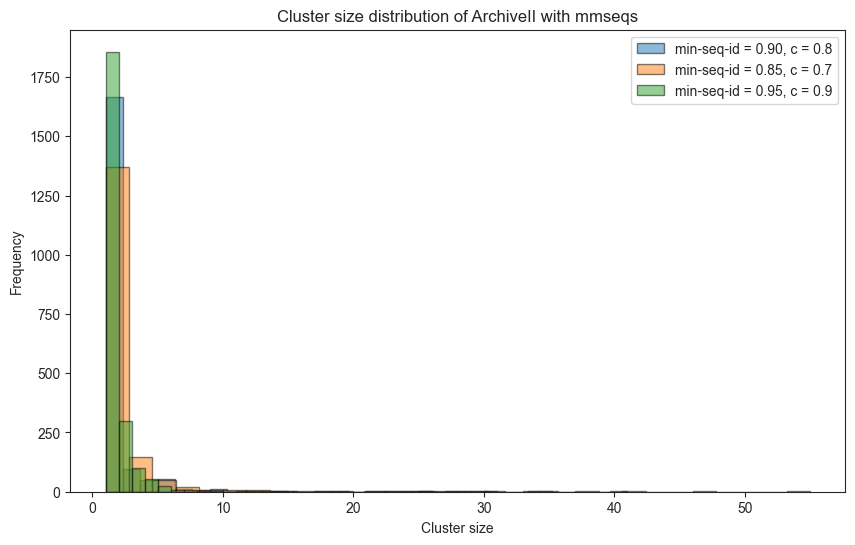

In [29]:
import matplotlib.pyplot as plt
#TODO: is it possible to specify bin width? Because they look weird.
# Plot the histogram of cluster size distributions for all three dataframes on the same figure
plt.figure(figsize=(10, 6))

# Plot for the original clustering
plt.hist(cluster_size_sorted['Cluster_Size'], bins=30, alpha=0.5, label='min-seq-id = 0.90, c = 0.8', edgecolor='k', log=False)

# Plot for the less strict clustering
cluster_size_less_strict = cluster_df_less_strict.groupby('Cluster_Rep').size().reset_index(name='Cluster_Size')
plt.hist(cluster_size_less_strict['Cluster_Size'], bins=30, alpha=0.5, label='min-seq-id = 0.85, c = 0.7', edgecolor='k', log=False)

# Plot for the more strict clustering
cluster_size_more_strict = cluster_df_more_strict.groupby('Cluster_Rep').size().reset_index(name='Cluster_Size')
plt.hist(cluster_size_more_strict['Cluster_Size'], bins=30, alpha=0.5, label='min-seq-id = 0.95, c = 0.9', edgecolor='k', log=False)

plt.title('Cluster size distribution of ArchiveII with mmseqs')
plt.xlabel('Cluster size')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# do a study of the cluster size distribution with respect to individual parameters – try different coverage modes

Question: with 100% sequence identity match for sequence clustering, am I essentially just finding duplicate sequences? Would it be functionally any different from my hand-coded example?

Understand everything. Everything in these introductory tasks, we'll use later.

Easier to understand CNNs and Transformers

What are Weights
How to update? 
Gradient descent.

